# Lewagon X Femtasy 

## Hard Coded Info

In [1]:
# Dictionary to translate content_type integer into Category
content_type_dict = {1 : 'Soul',
                     2 : 'Sounds',
                     3 : 'Stories',
                     4 : 'Series',
                    }

In [2]:
user_kinks_10 = ['In public', # not in df
                 'At home',
                 'With a stranger',
                 'Authority',
                 'BDSM',
                 'Roleplay',
                 'Quickie',
                 'Group Sex',
                 'Queer',
                 'Toys', # not in df
]

In [3]:
#voice actor name from the website with how many uploads 
''' emanuel 96
    keno 86
    lia 32
    marie 40
    nela 85
    paul 14
    raphael 168
    samuel 120
    a.i. & u.j. 4
    anonym 43
    a.p. & i.z. 4
    ava 74
    celine 7
    c.f. 2
    claire 8 
    david 5
    e.g. 2
    elena 25
    emilia 8
    esme 47
    gabriel & eva 12
    Hannah 3
    inja 3
    ivy 19
    j.a. 2
    jackson 21
    james 16
    j.e. 2
    josha 35
    j.w. 2
    k.u. 2
    l.d. 2
    l.d. & s.m. 4
    lena 3
    lennard 4
    leo 93
    levi 19
    lewis 109
    lilly 6 
    lorena 40
    luc 9
    lucia & diego 12
    luis 24
    lukas 3
    marco 9 
    milo 17
    mira 21
    m.k. 2
    m.r. 2 
    neilo 123
    n.l. 2
    o.f 2
    pantea 57
    philippe 96
    p.l 2
    ron 27
    serena 3
    s.i. 2
    s.o. 2
    sofia 21
    t.a. 23
    theo 27
    thiago 24
    tim & livia 10
    t.m. 2
    tom 8
    tristan 6
    u.h. 2
    valeria 4
    viktor 29
    w.b. 2
    x.u. 2
    y.h. 2
    zoe & noah 14
    '''

' emanuel 96\n    keno 86\n    lia 32\n    marie 40\n    nela 85\n    paul 14\n    raphael 168\n    samuel 120\n    a.i. & u.j. 4\n    anonym 43\n    a.p. & i.z. 4\n    ava 74\n    celine 7\n    c.f. 2\n    claire 8 \n    david 5\n    e.g. 2\n    elena 25\n    emilia 8\n    esme 47\n    gabriel & eva 12\n    Hannah 3\n    inja 3\n    ivy 19\n    j.a. 2\n    jackson 21\n    james 16\n    j.e. 2\n    josha 35\n    j.w. 2\n    k.u. 2\n    l.d. 2\n    l.d. & s.m. 4\n    lena 3\n    lennard 4\n    leo 93\n    levi 19\n    lewis 109\n    lilly 6 \n    lorena 40\n    luc 9\n    lucia & diego 12\n    luis 24\n    lukas 3\n    marco 9 \n    milo 17\n    mira 21\n    m.k. 2\n    m.r. 2 \n    neilo 123\n    n.l. 2\n    o.f 2\n    pantea 57\n    philippe 96\n    p.l 2\n    ron 27\n    serena 3\n    s.i. 2\n    s.o. 2\n    sofia 21\n    t.a. 23\n    theo 27\n    thiago 24\n    tim & livia 10\n    t.m. 2\n    tom 8\n    tristan 6\n    u.h. 2\n    valeria 4\n    viktor 29\n    w.b. 2\n    x.u. 2\n   

## Data

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#df = pd.read_excel('/Users/sophiemartusewicz/code/SophieMartusewicz/lewagonXfemtasy/raw_data/raw_data.xlsx')

In [6]:
path_data = os.path.join('..', 'lewagonXfemtasy', 'raw_data', 'raw_data.xlsx')
df = pd.read_excel(path_data)

In [7]:
df

,Status Labels,Anonymized ID,Anonymized Story IDs,Anonymized Voice IDs,Voice Type,Genre,Language Intensity,Story Listen Timestamp,Session Breakups,Story Release Date,Kinkiness Score,Unnamed: 11,Content Types,Story Duration,Play Duration
0,Long-Term Active,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 18:55:29,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,296
1,Long-Term Active,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,30732,1344,female,Guided Masturbation,Intense,2022-07-16 17:18:25,2022-7-16-Early,2021-12-10 14:55:00,401,Guided,1,1584,60
2,Long-Term Active,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,33108,672,female,Guided Masturbation,Intense,2022-07-17 21:09:51,2022-7-17-Late Peak,2022-04-22 14:57:45,201,Guided,1,800,60
3,Long-Term Active,b6193336b972facd129ddaf77a718008748e373a6b579a...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 14:31:06,2022-7-15-Early,2022-01-27 15:10:32,401,Guided,1,1203,60
4,Long-Term Active,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 19:03:26,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021,Short-Term Active,e6b85759c4abeb56e1946bbb4c94be63a0842a256cae9f...,27192,1248,male,Phone Sex,Soft,2022-07-17 00:03:08,2022-7-16-Late Peak,2021-06-12 13:00:00,201,Phone,3,317,316
12022,Short-Term Active,4e008ddd59934e961eab4ccf42a3c16fd0f9795ba40ea5...,27192,1248,male,Phone Sex,Soft,2022-07-18 14:56:26,2022-7-18-Early,2021-06-12 13:00:00,201,Phone,3,317,316
12023,Short-Term Active,a747ec6ab408692145f8435da174c10b3cd888459287c7...,22224,336,male,Phone Sex,Soft,2022-07-19 00:16:38,2022-7-18-Late Peak,2020-11-15 17:00:00,201,At home,3,490,489
12024,Short-Term Active,0d4aa3734ecdd466e2aa6a3c5b9ca414aef1eca60e82a2...,27192,1248,male,Phone Sex,Soft,2022-07-19 13:48:53,2022-7-19-Early,2021-06-12 13:00:00,201,Phone,3,317,316


In [8]:
# Rename unnamed column to 'fantasies'
df = df.rename(columns={'Unnamed: 11': 'fantasies',
                        'Status Labels': 'longterm',
                       'Anonymized ID': 'user',
                       'Anonymized Story IDs': 'story id',
                       'Anonymized Voice IDs': 'voice id',
                        'Voice Type': 'voice type',
                       'Genre': 'genre',
                       'Language Intensity': 'language intensity',
                       'Story Listen Timestamp': 'timestamp',
                       'Session Breakups': 'session breakups', 
                       'Story Release Date': 'story release date',
                       'Kinkiness Score': 'kinky score',
                       'Content Types': 'content type', 
                       'Story Duration': 'story duration',
                       'Play Duration': 'play duration'})

In [9]:
df['longterm'] = df['longterm'].replace(['Long-Term Active','Short-Term Active'],[1,0])

In [10]:
df

,longterm,user,story id,voice id,voice type,genre,language intensity,timestamp,session breakups,story release date,kinky score,fantasies,content type,story duration,play duration
0,1,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 18:55:29,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,296
1,1,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,30732,1344,female,Guided Masturbation,Intense,2022-07-16 17:18:25,2022-7-16-Early,2021-12-10 14:55:00,401,Guided,1,1584,60
2,1,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,33108,672,female,Guided Masturbation,Intense,2022-07-17 21:09:51,2022-7-17-Late Peak,2022-04-22 14:57:45,201,Guided,1,800,60
3,1,b6193336b972facd129ddaf77a718008748e373a6b579a...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 14:31:06,2022-7-15-Early,2022-01-27 15:10:32,401,Guided,1,1203,60
4,1,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 19:03:26,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021,0,e6b85759c4abeb56e1946bbb4c94be63a0842a256cae9f...,27192,1248,male,Phone Sex,Soft,2022-07-17 00:03:08,2022-7-16-Late Peak,2021-06-12 13:00:00,201,Phone,3,317,316
12022,0,4e008ddd59934e961eab4ccf42a3c16fd0f9795ba40ea5...,27192,1248,male,Phone Sex,Soft,2022-07-18 14:56:26,2022-7-18-Early,2021-06-12 13:00:00,201,Phone,3,317,316
12023,0,a747ec6ab408692145f8435da174c10b3cd888459287c7...,22224,336,male,Phone Sex,Soft,2022-07-19 00:16:38,2022-7-18-Late Peak,2020-11-15 17:00:00,201,At home,3,490,489
12024,0,0d4aa3734ecdd466e2aa6a3c5b9ca414aef1eca60e82a2...,27192,1248,male,Phone Sex,Soft,2022-07-19 13:48:53,2022-7-19-Early,2021-06-12 13:00:00,201,Phone,3,317,316


In [11]:
df.shape

(12026, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   longterm            12026 non-null  int64         
 1   user                12026 non-null  object        
 2   story id            12026 non-null  int64         
 3   voice id            12026 non-null  int64         
 4   voice type          12026 non-null  object        
 5   genre               12026 non-null  object        
 6   language intensity  12026 non-null  object        
 7   timestamp           12026 non-null  datetime64[ns]
 8   session breakups    12026 non-null  object        
 9   story release date  12026 non-null  datetime64[ns]
 10  kinky score         12026 non-null  int64         
 11  fantasies           12026 non-null  object        
 12  content type        12026 non-null  int64         
 13  story duration      12026 non-null  int64     

In [13]:
df.describe()

,longterm,story id,voice id,kinky score,content type,story duration,play duration
count,12026.000000,12026.000000,12026.000000,12026.000000,12026.000000,12026.000000,12026.000000
mean,0.405704,24926.610344,1524.884084,419.381507,2.585731,599.312074,292.742974
std,0.491048,10801.451522,1380.309823,113.787839,0.622790,320.663756,297.423676
min,0.000000,144.000000,120.000000,1.000000,1.000000,85.000000,60.000000
25%,0.000000,20991.000000,336.000000,401.000000,2.000000,358.000000,60.000000
50%,0.000000,30144.000000,1104.000000,501.000000,3.000000,557.000000,170.000000
75%,1.000000,33168.000000,3096.000000,501.000000,3.000000,787.000000,436.000000
max,1.000000,34128.000000,4320.000000,510.000000,4.000000,2240.000000,1805.000000


# Cleaning Data

## Duplicates

In [14]:
len(df)

12026

In [15]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12021    False
12022    False
12023    False
12024    False
12025    False
Length: 12026, dtype: bool

In [16]:
df.duplicated().sum()

434

In [17]:
df[df.duplicated()]

,longterm,user,story id,voice id,voice type,genre,language intensity,timestamp,session breakups,story release date,kinky score,fantasies,content type,story duration,play duration
85,1,6142ca2b724aa3a3b2209065e97482ede5673751463831...,6828,1104,anonym,Sex Sounds,Intense,2022-07-15 14:52:44,2022-7-15-Early,2019-04-26 10:30:46,402,Quickie,2,207,207
86,1,6142ca2b724aa3a3b2209065e97482ede5673751463831...,6828,1104,anonym,Sex Sounds,Intense,2022-07-15 14:52:44,2022-7-15-Early,2019-04-26 10:30:46,402,Quickie,2,207,207
117,1,2cdabe4def61d6f60bf9aef63a691c82c769645a1139e3...,6828,1104,anonym,Sex Sounds,Intense,2022-07-15 22:24:23,2022-7-15-Late Peak,2019-04-26 10:30:46,402,Quickie,2,207,148
118,1,2cdabe4def61d6f60bf9aef63a691c82c769645a1139e3...,6828,1104,anonym,Sex Sounds,Intense,2022-07-15 22:24:23,2022-7-15-Late Peak,2019-04-26 10:30:46,402,Quickie,2,207,148
124,1,6c586b2a574b64a474856d7e5c49f118fd487f944356e9...,31224,1104,anonym,Sex Sounds,Intense,2022-07-15 11:47:27,2022-7-15-Early,2022-01-19 11:08:37,502,At home,2,617,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,0,9e97ec1a25c35324098829157ecf7fcb243feefc5b4b64...,27024,1080,male,Phone Sex,Rough,2022-07-17 13:48:33,2022-7-17-Early,2021-06-03 15:05:30,501,At home,3,559,559
11808,0,4b46eb2de01deaa45ee5ff444baccf819883275c7e6c10...,32544,2808,male,Phone Sex,Rough,2022-07-17 19:31:18,2022-7-17-First Peak,2022-06-15 13:00:00,301,Group sex,3,849,60
11815,0,9ac617b17203443d82cf83bc754cf82ea8f2c13296cb9f...,25920,3000,male,Phone Sex,Rough,2022-07-17 22:31:31,2022-7-17-Late Peak,2020-10-29 17:00:00,201,Phone,3,459,418
11824,0,8404d10bb93fab248f899e1d2762b0c7ede963dae6057b...,32136,2808,male,Phone Sex,Rough,2022-07-18 11:09:56,2022-7-18-Early,2022-04-01 13:00:00,101,Doggy style,3,307,60


In [18]:
# Drop Row-duplicates
df = df.drop_duplicates()

## Missing Values

In [19]:
df.isnull().sum()

longterm              0
user                  0
story id              0
voice id              0
voice type            0
genre                 0
language intensity    0
timestamp             0
session breakups      0
story release date    0
kinky score           0
fantasies             0
content type          0
story duration        0
play duration         0
dtype: int64

In [20]:
df.isnull().sum() / df.shape[0] * 100

longterm              0.0
user                  0.0
story id              0.0
voice id              0.0
voice type            0.0
genre                 0.0
language intensity    0.0
timestamp             0.0
session breakups      0.0
story release date    0.0
kinky score           0.0
fantasies             0.0
content type          0.0
story duration        0.0
play duration         0.0
dtype: float64

# Split "Session Breakups" 

In [21]:
# Split 'Session Breakups' into single parts
df['session breakups_date'] = df['session breakups'].str[:9]
df['session breakups_breakup'] = df['session breakups'].str.slice(start=10)

/var/folders/c1/nrgf0h0964zbt7q_tc2xgv_m0000gn/T/ipykernel_39047/3203370604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['session breakups_date'] = df['session breakups'].str[:9]
/var/folders/c1/nrgf0h0964zbt7q_tc2xgv_m0000gn/T/ipykernel_39047/3203370604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['session breakups_breakup'] = df['session breakups'].str.slice(start=10)


In [22]:
df

,longterm,user,story id,voice id,voice type,genre,language intensity,timestamp,session breakups,story release date,kinky score,fantasies,content type,story duration,play duration,session breakups_date,session breakups_breakup
0,1,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 18:55:29,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,296,2022-7-15,First Peak
1,1,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,30732,1344,female,Guided Masturbation,Intense,2022-07-16 17:18:25,2022-7-16-Early,2021-12-10 14:55:00,401,Guided,1,1584,60,2022-7-16,Early
2,1,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,33108,672,female,Guided Masturbation,Intense,2022-07-17 21:09:51,2022-7-17-Late Peak,2022-04-22 14:57:45,201,Guided,1,800,60,2022-7-17,Late Peak
3,1,b6193336b972facd129ddaf77a718008748e373a6b579a...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 14:31:06,2022-7-15-Early,2022-01-27 15:10:32,401,Guided,1,1203,60,2022-7-15,Early
4,1,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 19:03:26,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,458,2022-7-15,First Peak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021,0,e6b85759c4abeb56e1946bbb4c94be63a0842a256cae9f...,27192,1248,male,Phone Sex,Soft,2022-07-17 00:03:08,2022-7-16-Late Peak,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-16,Late Peak
12022,0,4e008ddd59934e961eab4ccf42a3c16fd0f9795ba40ea5...,27192,1248,male,Phone Sex,Soft,2022-07-18 14:56:26,2022-7-18-Early,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-18,Early
12023,0,a747ec6ab408692145f8435da174c10b3cd888459287c7...,22224,336,male,Phone Sex,Soft,2022-07-19 00:16:38,2022-7-18-Late Peak,2020-11-15 17:00:00,201,At home,3,490,489,2022-7-18,Late Peak
12024,0,0d4aa3734ecdd466e2aa6a3c5b9ca414aef1eca60e82a2...,27192,1248,male,Phone Sex,Soft,2022-07-19 13:48:53,2022-7-19-Early,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-19,Early


# Split Kinkiness Score

We are splitting the kinkscore into its 2 components for easier use: 

Kinkiness scores are on a scale of 1-510. The hundreds place shows the max kinkiness of the story’s themes, the other digits show how many tags with that kinkiness level are in the story (so a story with 10 different kink-5 tags has a score of 510)

In [23]:
def split_score(df):
    def user_kinks(value):
        if value >100:
            return str(value)[1:]
        else:
            return 0
    df['audio_intensity'] = pd.to_numeric(df['kinky score'].apply(lambda x: str(x)[0]))
    df['audio_kinks'] = pd.to_numeric(df['kinky score'].apply(lambda x: user_kinks(x)))
    
    return df

In [24]:
df = split_score(df)
df

/var/folders/c1/nrgf0h0964zbt7q_tc2xgv_m0000gn/T/ipykernel_39047/2476798696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['audio_intensity'] = pd.to_numeric(df['kinky score'].apply(lambda x: str(x)[0]))
/var/folders/c1/nrgf0h0964zbt7q_tc2xgv_m0000gn/T/ipykernel_39047/2476798696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['audio_kinks'] = pd.to_numeric(df['kinky score'].apply(lambda x: user_kinks(x)))


,longterm,user,story id,voice id,voice type,genre,language intensity,timestamp,session breakups,story release date,kinky score,fantasies,content type,story duration,play duration,session breakups_date,session breakups_breakup,audio_intensity,audio_kinks
0,1,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 18:55:29,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,296,2022-7-15,First Peak,4,1
1,1,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,30732,1344,female,Guided Masturbation,Intense,2022-07-16 17:18:25,2022-7-16-Early,2021-12-10 14:55:00,401,Guided,1,1584,60,2022-7-16,Early,4,1
2,1,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,33108,672,female,Guided Masturbation,Intense,2022-07-17 21:09:51,2022-7-17-Late Peak,2022-04-22 14:57:45,201,Guided,1,800,60,2022-7-17,Late Peak,2,1
3,1,b6193336b972facd129ddaf77a718008748e373a6b579a...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 14:31:06,2022-7-15-Early,2022-01-27 15:10:32,401,Guided,1,1203,60,2022-7-15,Early,4,1
4,1,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 19:03:26,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,458,2022-7-15,First Peak,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021,0,e6b85759c4abeb56e1946bbb4c94be63a0842a256cae9f...,27192,1248,male,Phone Sex,Soft,2022-07-17 00:03:08,2022-7-16-Late Peak,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-16,Late Peak,2,1
12022,0,4e008ddd59934e961eab4ccf42a3c16fd0f9795ba40ea5...,27192,1248,male,Phone Sex,Soft,2022-07-18 14:56:26,2022-7-18-Early,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-18,Early,2,1
12023,0,a747ec6ab408692145f8435da174c10b3cd888459287c7...,22224,336,male,Phone Sex,Soft,2022-07-19 00:16:38,2022-7-18-Late Peak,2020-11-15 17:00:00,201,At home,3,490,489,2022-7-18,Late Peak,2,1
12024,0,0d4aa3734ecdd466e2aa6a3c5b9ca414aef1eca60e82a2...,27192,1248,male,Phone Sex,Soft,2022-07-19 13:48:53,2022-7-19-Early,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-19,Early,2,1


# Counting Stuff 

In [25]:
user_count = df['user'].nunique()
user_count

2856

In [26]:
actor_count = df['voice id'].nunique()
actor_count

86

In [27]:
# website shows 1574 stories df has only 1061
story_count = df['story id'].nunique()
story_count

1061

In [28]:
fantasy_count = df['fantasies'].nunique()
fantasy_count

44

In [29]:
kink_count = df['kinky score'].nunique()
kink_count

32

In [30]:
df.groupby('language intensity').count()

,longterm,user,story id,voice id,voice type,genre,timestamp,session breakups,story release date,kinky score,fantasies,content type,story duration,play duration,session breakups_date,session breakups_breakup,audio_intensity,audio_kinks
language intensity,,,,,,,,,,,,,,,,,,
Intense,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926
Rough,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967
Soft,699,699,699,699,699,699,699,699,699,699,699,699,699,699,699,699,699,699


In [31]:
df.groupby('audio_kinks').count()

,longterm,user,story id,voice id,voice type,genre,language intensity,timestamp,session breakups,story release date,kinky score,fantasies,content type,story duration,play duration,session breakups_date,session breakups_breakup,audio_intensity
audio_kinks,,,,,,,,,,,,,,,,,,
0,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
1,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054
2,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991,2991
3,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851,851
4,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391
5,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153,153
6,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
7,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
8,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


# Value Counts

In [32]:
df.head()

,longterm,user,story id,voice id,voice type,genre,language intensity,timestamp,session breakups,story release date,kinky score,fantasies,content type,story duration,play duration,session breakups_date,session breakups_breakup,audio_intensity,audio_kinks
0,1,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 18:55:29,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,296,2022-7-15,First Peak,4,1
1,1,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,30732,1344,female,Guided Masturbation,Intense,2022-07-16 17:18:25,2022-7-16-Early,2021-12-10 14:55:00,401,Guided,1,1584,60,2022-7-16,Early,4,1
2,1,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,33108,672,female,Guided Masturbation,Intense,2022-07-17 21:09:51,2022-7-17-Late Peak,2022-04-22 14:57:45,201,Guided,1,800,60,2022-7-17,Late Peak,2,1
3,1,b6193336b972facd129ddaf77a718008748e373a6b579a...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 14:31:06,2022-7-15-Early,2022-01-27 15:10:32,401,Guided,1,1203,60,2022-7-15,Early,4,1
4,1,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 19:03:26,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,458,2022-7-15,First Peak,4,1


In [33]:
df['voice type'].value_counts()

male           6451
female         2036
anonym         1572
male_female     836
female_male     697
Name: voice type, dtype: int64

In [34]:
df['genre'].value_counts()

Erotic Stories         4944
Sex Sounds             2994
Phone Sex              1014
360° Audios             823
Sounds of Lovers        738
Moaning Sounds          690
Guided Masturbation     257
Love Letters             95
Affirmations             31
Meditations               6
Name: genre, dtype: int64

In [35]:
df['kinky score'].value_counts()

501    4162
401    1548
502    1252
402    1208
301     666
201     583
503     540
302     324
504     275
202     175
103     131
104     109
403     101
101      95
505      85
105      68
506      54
303      44
3        35
203      35
102      32
106      24
508      17
4         6
2         6
1         5
304       4
507       3
404       2
509       1
204       1
510       1
Name: kinky score, dtype: int64

1 = Soul    
2 = Sounds    
3 = Stories    
4 = Series

In [36]:
df['content type'].value_counts()

3    6310
2    4422
4     471
1     389
Name: content type, dtype: int64

In [37]:
df['language intensity'].value_counts()

Intense    7926
Rough      2967
Soft        699
Name: language intensity, dtype: int64

In [38]:
df['fantasies'].value_counts()

At home                 1991
Community               1422
Female-Male              985
BDSM                     932
With a stranger          747
Moaning                  702
Voyeurism                679
Authority                597
In Nature                476
Quickie                  371
Holiday                  348
Phone                    293
Female-Female            292
Queer                    262
Guided                   257
Sex Club                 135
Infidelity               116
Winter                   104
Couple                    88
Edging                    85
Dirty Talk                85
Soft BDSM                 84
Self-Love                 81
Summer                    64
Under the shower          61
Bi-curious                58
Submission                54
Loveletter                43
Group sex                 40
Pegging                   31
Sex Work                  27
Swinging                  21
Valentine's Day           12
Forbidden Attraction      10
Threesome     

In [39]:
df['session breakups_breakup'].value_counts()

Early         4563
Late Peak     2966
First Peak    2196
OFF           1867
Name: session breakups_breakup, dtype: int64

# Voice Popularity 

In [40]:
def voice_popularity(df):
    df['voice_popularity'] = df['voice id'].apply(lambda x: df['voice id'].value_counts()[x])
    return df

In [41]:
df = voice_popularity(df)
df

/var/folders/c1/nrgf0h0964zbt7q_tc2xgv_m0000gn/T/ipykernel_39047/177865648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['voice_popularity'] = df['voice id'].apply(lambda x: df['voice id'].value_counts()[x])


,longterm,user,story id,voice id,voice type,genre,language intensity,timestamp,session breakups,story release date,kinky score,fantasies,content type,story duration,play duration,session breakups_date,session breakups_breakup,audio_intensity,audio_kinks,voice_popularity
0,1,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 18:55:29,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,296,2022-7-15,First Peak,4,1,280
1,1,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,30732,1344,female,Guided Masturbation,Intense,2022-07-16 17:18:25,2022-7-16-Early,2021-12-10 14:55:00,401,Guided,1,1584,60,2022-7-16,Early,4,1,223
2,1,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,33108,672,female,Guided Masturbation,Intense,2022-07-17 21:09:51,2022-7-17-Late Peak,2022-04-22 14:57:45,201,Guided,1,800,60,2022-7-17,Late Peak,2,1,165
3,1,b6193336b972facd129ddaf77a718008748e373a6b579a...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 14:31:06,2022-7-15-Early,2022-01-27 15:10:32,401,Guided,1,1203,60,2022-7-15,Early,4,1,280
4,1,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 19:03:26,2022-7-15-First Peak,2022-01-27 15:10:32,401,Guided,1,1203,458,2022-7-15,First Peak,4,1,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021,0,e6b85759c4abeb56e1946bbb4c94be63a0842a256cae9f...,27192,1248,male,Phone Sex,Soft,2022-07-17 00:03:08,2022-7-16-Late Peak,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-16,Late Peak,2,1,475
12022,0,4e008ddd59934e961eab4ccf42a3c16fd0f9795ba40ea5...,27192,1248,male,Phone Sex,Soft,2022-07-18 14:56:26,2022-7-18-Early,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-18,Early,2,1,475
12023,0,a747ec6ab408692145f8435da174c10b3cd888459287c7...,22224,336,male,Phone Sex,Soft,2022-07-19 00:16:38,2022-7-18-Late Peak,2020-11-15 17:00:00,201,At home,3,490,489,2022-7-18,Late Peak,2,1,2227
12024,0,0d4aa3734ecdd466e2aa6a3c5b9ca414aef1eca60e82a2...,27192,1248,male,Phone Sex,Soft,2022-07-19 13:48:53,2022-7-19-Early,2021-06-12 13:00:00,201,Phone,3,317,316,2022-7-19,Early,2,1,475


# Play Percentage

In [42]:
df['play_percentage'] = df['play duration'] / df['story duration']

/var/folders/c1/nrgf0h0964zbt7q_tc2xgv_m0000gn/T/ipykernel_39047/3595071878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['play_percentage'] = df['play duration'] / df['story duration']


# Rough visualization of the data


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

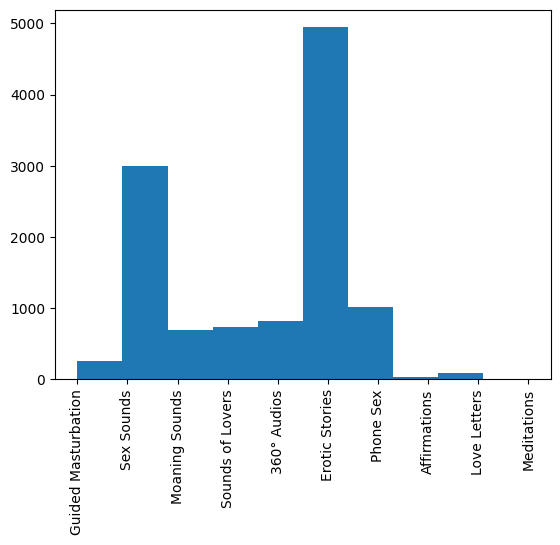

In [44]:
plt.hist(df["genre"])
plt.xticks(rotation='vertical')

plt.show()

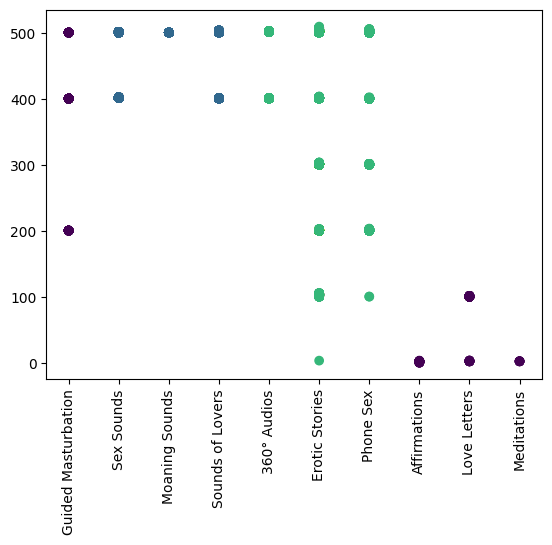

In [45]:
plt.scatter(x = df["genre"], y = df['kinky score'], c = df["content type"])
plt.xticks(rotation='vertical')


plt.show()

(array([ 389.,    0.,    0., 4422.,    0.,    0., 6310.,    0.,    0.,
         471.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

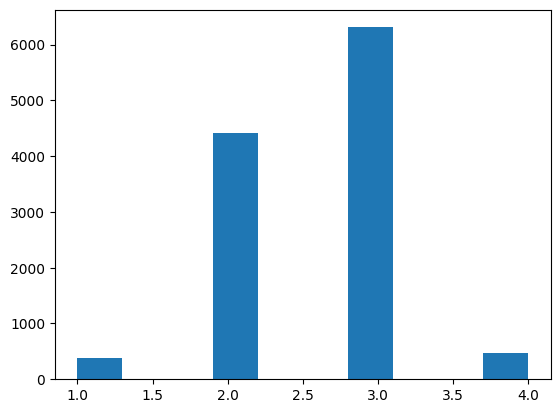

In [46]:
plt.hist(df["content type"])

## Distributions

<Figure size 13000x18000 with 0 Axes>

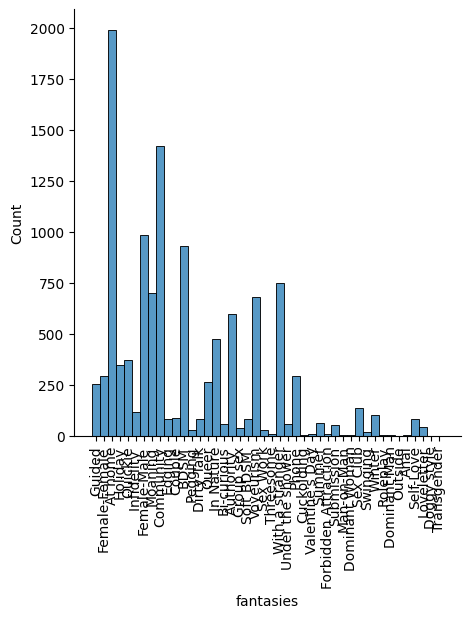

In [47]:
plt.figure(figsize=(130,180))
ax = sns.displot(df, x="fantasies", label='small')

ax.set_xticklabels(rotation=90)

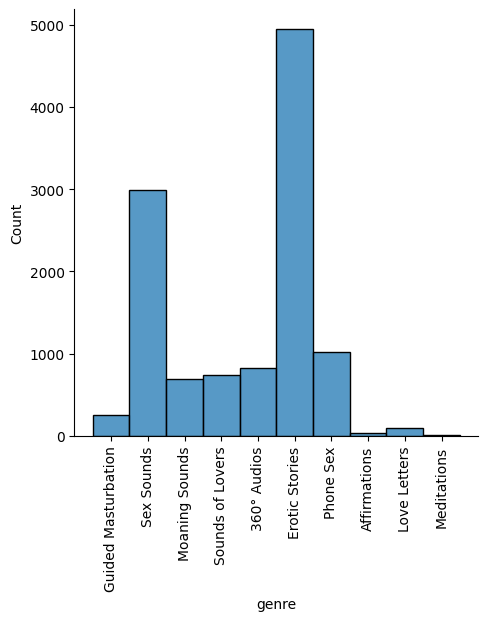

In [48]:
ax = sns.displot(df, x="genre")
ax.set_xticklabels(rotation=90)

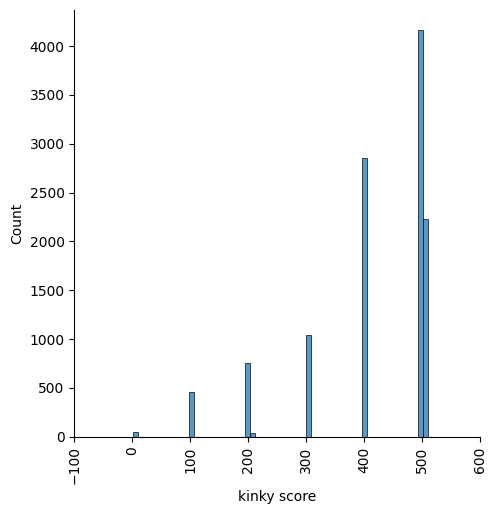

In [49]:
ax = sns.displot(df, x="kinky score")
ax.set_xticklabels(rotation=90)

<Figure size 13000x18000 with 0 Axes>

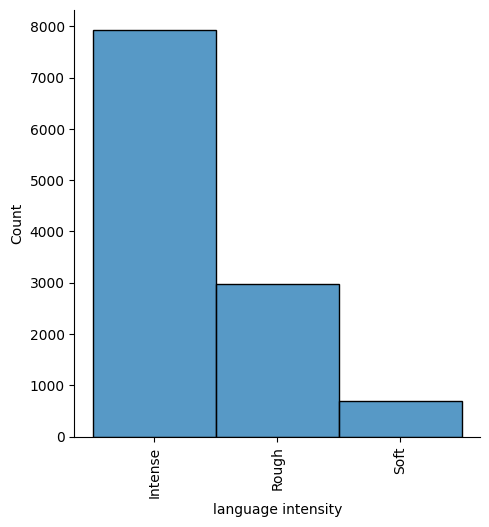

In [50]:
plt.figure(figsize=(130,180))
ax = sns.displot(df, x="language intensity")

ax.set_xticklabels(rotation=90)

<Figure size 13000x18000 with 0 Axes>

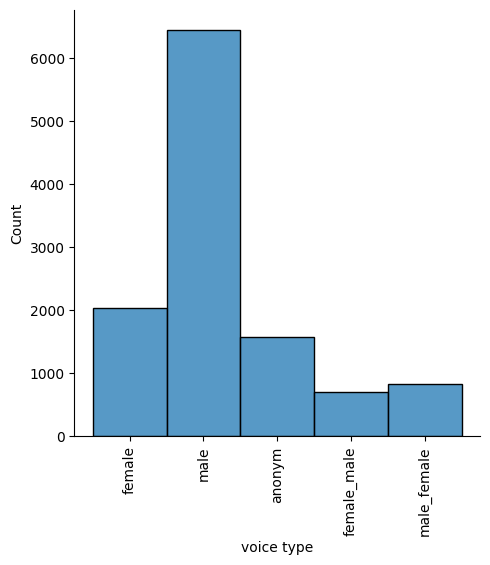

In [51]:
plt.figure(figsize=(130,180))
ax = sns.displot(df, x="voice type")

ax.set_xticklabels(rotation=90)

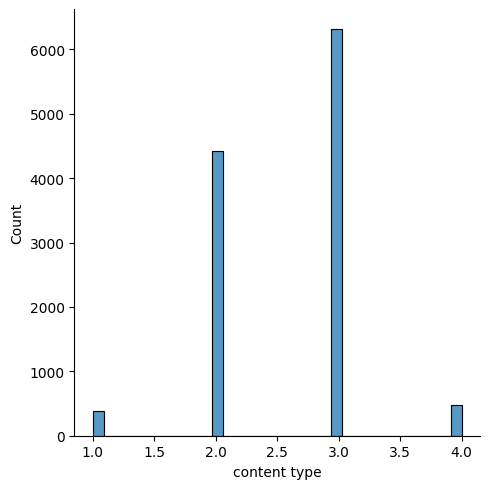

In [52]:
sns.displot(df, x="content type")


# Scatter Matrix 

Uncomment the Scatter Matrix 

In [53]:
import seaborn as sns
sns.set_theme(style="ticks")

#sns.pairplot(df, hue="fantasies")

In [54]:
df.corr().round(2)

,longterm,story id,voice id,kinky score,content type,story duration,play duration,audio_intensity,audio_kinks,voice_popularity,play_percentage
longterm,1.00,-0.01,0.02,0.04,0.03,-0.03,0.01,0.04,0.02,-0.00,0.02
story id,-0.01,1.00,0.38,0.11,-0.14,0.05,0.03,0.11,-0.13,-0.15,0.03
voice id,0.02,0.38,1.00,0.28,-0.46,-0.34,-0.12,0.28,-0.25,-0.62,0.11
kinky score,0.04,0.11,0.28,1.00,-0.26,-0.26,-0.13,0.99,-0.08,-0.08,0.04
content type,0.03,-0.14,-0.46,-0.26,1.00,0.42,0.21,-0.29,0.26,0.18,-0.10
story duration,-0.03,0.05,-0.34,-0.26,0.42,1.00,0.42,-0.28,0.12,0.15,-0.17
play duration,0.01,0.03,-0.12,-0.13,0.21,0.42,1.00,-0.13,0.03,0.05,0.72
audio_intensity,0.04,0.11,0.28,0.99,-0.29,-0.28,-0.13,1.00,-0.11,-0.08,0.04
audio_kinks,0.02,-0.13,-0.25,-0.08,0.26,0.12,0.03,-0.11,1.00,0.11,-0.06
voice_popularity,-0.00,-0.15,-0.62,-0.08,0.18,0.15,0.05,-0.08,0.11,1.00,-0.07


<AxesSubplot:>

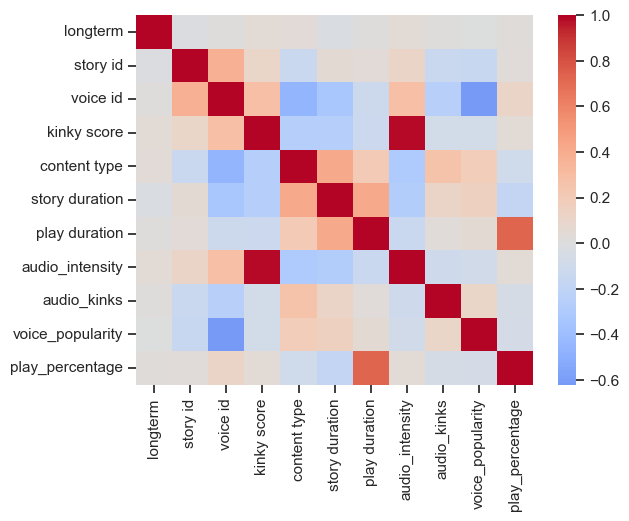

In [55]:
sns.heatmap(df.corr(), center=0, cmap='coolwarm')

<AxesSubplot:>

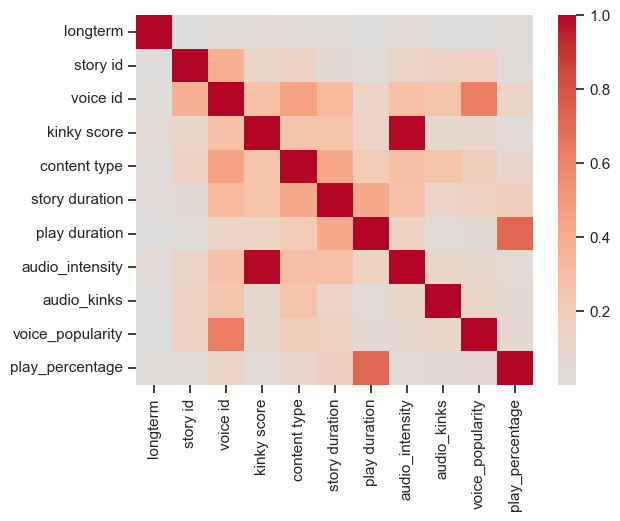

In [56]:
sns.heatmap(df.corr().abs(), center=0, cmap='coolwarm')

# User interaction 

In [57]:
# 'Soft' < 'Intense' < 'Rough'
df['language intensity'].unique()

lang_intensity_dict = {'Soft': 1, 'Intense': 2, 'Rough': 3}
#df['Language Intensity'] = df['Language Intensity'].str.replace(lang_intensity_dict)
df

,longterm,user,story id,voice id,voice type,genre,language intensity,timestamp,session breakups,story release date,...,fantasies,content type,story duration,play duration,session breakups_date,session breakups_breakup,audio_intensity,audio_kinks,voice_popularity,play_percentage
0,1,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 18:55:29,2022-7-15-First Peak,2022-01-27 15:10:32,...,Guided,1,1203,296,2022-7-15,First Peak,4,1,280,0.246052
1,1,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,30732,1344,female,Guided Masturbation,Intense,2022-07-16 17:18:25,2022-7-16-Early,2021-12-10 14:55:00,...,Guided,1,1584,60,2022-7-16,Early,4,1,223,0.037879
2,1,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,33108,672,female,Guided Masturbation,Intense,2022-07-17 21:09:51,2022-7-17-Late Peak,2022-04-22 14:57:45,...,Guided,1,800,60,2022-7-17,Late Peak,2,1,165,0.075000
3,1,b6193336b972facd129ddaf77a718008748e373a6b579a...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 14:31:06,2022-7-15-Early,2022-01-27 15:10:32,...,Guided,1,1203,60,2022-7-15,Early,4,1,280,0.049875
4,1,3254bdad77021d79710aeba13b47321380560bd28e9294...,31344,1392,female,Guided Masturbation,Intense,2022-07-15 19:03:26,2022-7-15-First Peak,2022-01-27 15:10:32,...,Guided,1,1203,458,2022-7-15,First Peak,4,1,280,0.380715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021,0,e6b85759c4abeb56e1946bbb4c94be63a0842a256cae9f...,27192,1248,male,Phone Sex,Soft,2022-07-17 00:03:08,2022-7-16-Late Peak,2021-06-12 13:00:00,...,Phone,3,317,316,2022-7-16,Late Peak,2,1,475,0.996845
12022,0,4e008ddd59934e961eab4ccf42a3c16fd0f9795ba40ea5...,27192,1248,male,Phone Sex,Soft,2022-07-18 14:56:26,2022-7-18-Early,2021-06-12 13:00:00,...,Phone,3,317,316,2022-7-18,Early,2,1,475,0.996845
12023,0,a747ec6ab408692145f8435da174c10b3cd888459287c7...,22224,336,male,Phone Sex,Soft,2022-07-19 00:16:38,2022-7-18-Late Peak,2020-11-15 17:00:00,...,At home,3,490,489,2022-7-18,Late Peak,2,1,2227,0.997959
12024,0,0d4aa3734ecdd466e2aa6a3c5b9ca414aef1eca60e82a2...,27192,1248,male,Phone Sex,Soft,2022-07-19 13:48:53,2022-7-19-Early,2021-06-12 13:00:00,...,Phone,3,317,316,2022-7-19,Early,2,1,475,0.996845


## What actors are users listening to? 

In [58]:
pd.DataFrame(df.groupby("user")['voice id'].value_counts())

voice id
user                                               voice id          
0006922a7e69784dd6165b5229534e9d9888ac6c8909f23... 216              1
004cfed8fb50838bfa26107fdc9cb3e09dbeb209c991169... 1104             9
                                                   672              1
                                                   744              1
                                                   912              1
...                                                               ...
ffc0b5fe473e67222acba4378f38e7261e9989e209c3f96... 3672             1
                                                   3984             1
ffcb993fedbecf57003c135a1e110426e54322c61debc50... 216              1
                                                   3624             1
ffec5c5532b97dd631c55a75c4ac46c84de5cebba2643f9... 2904             1

[7874 rows x 1 columns]

## When are users listening to stories?

In [59]:
pd.DataFrame(df.groupby("user")['timestamp'].value_counts())

timestamp
user                                               timestamp                     
0006922a7e69784dd6165b5229534e9d9888ac6c8909f23... 2022-07-19 05:11:49          1
004cfed8fb50838bfa26107fdc9cb3e09dbeb209c991169... 2022-07-15 00:00:38          1
                                                   2022-07-15 00:18:40          1
                                                   2022-07-15 04:12:48          1
                                                   2022-07-15 04:21:06          1
...                                                                           ...
ffc0b5fe473e67222acba4378f38e7261e9989e209c3f96... 2022-07-17 21:46:49          1
                                                   2022-07-17 21:48:14          1
ffcb993fedbecf57003c135a1e110426e54322c61debc50... 2022-07-16 13:11:35          1
                                                   2022-07-19 14:29:39          1
ffec5c5532b97dd631c55a75c4ac46c84de5cebba2643f9... 2022-07-19 19:50:37          1

[11503 rows x 1 columns]

In [60]:
pd.DataFrame(df.groupby("user")['timestamp'].count())

,timestamp
user,
0006922a7e69784dd6165b5229534e9d9888ac6c8909f2335b292620310e9813,1
004cfed8fb50838bfa26107fdc9cb3e09dbeb209c991169e40366a0e291ac8f4,15
005fe78e1beb6fe3e16c6d856f5bc16bebad8f4ff3732b02ab3e3c10412dd074,4
006ac84dd3555bf904894839e8be61c04084edc0f19618b87989f91c78666f5c,3
00835c0b351b89768c72a55f5f6999879e2c7bdf9e469f3d7271069fb45116f7,1
...,...
ffb599d3ace56887b2cc4f1ec7ee80182981d19411701660a003ff62e0d61d27,1
ffbfbae77455774cab2ce1ddcd7d3157a9cb0a8ae316061dd85843557de82a32,3
ffc0b5fe473e67222acba4378f38e7261e9989e209c3f96da6ac31d4b6ae7faa,3


## What fantasies are users listening to? 

In [61]:
pd.DataFrame(df.groupby("user")['fantasies'].value_counts())

fantasies
user                                               fantasies             
0006922a7e69784dd6165b5229534e9d9888ac6c8909f23... BDSM                 1
004cfed8fb50838bfa26107fdc9cb3e09dbeb209c991169... At home              8
                                                   Authority            2
                                                   Female-Male          1
                                                   Holiday              1
...                                                                   ...
ffc0b5fe473e67222acba4378f38e7261e9989e209c3f96... BDSM                 1
                                                   Community            1
                                                   Edging               1
ffcb993fedbecf57003c135a1e110426e54322c61debc50... Authority            2
ffec5c5532b97dd631c55a75c4ac46c84de5cebba2643f9... Quickie              1

[7965 rows x 1 columns]

## When and what are the users listening to?

In [62]:
df[["user","timestamp", "fantasies"]]

,user,timestamp,fantasies
0,3254bdad77021d79710aeba13b47321380560bd28e9294...,2022-07-15 18:55:29,Guided
1,0e1ce3011d0d542da18919f7cde7453a5451aa84bc378b...,2022-07-16 17:18:25,Guided
2,fdab774f1be31fad01abf50351ec35a855b96a41a51b55...,2022-07-17 21:09:51,Guided
3,b6193336b972facd129ddaf77a718008748e373a6b579a...,2022-07-15 14:31:06,Guided
4,3254bdad77021d79710aeba13b47321380560bd28e9294...,2022-07-15 19:03:26,Guided
...,...,...,...
12021,e6b85759c4abeb56e1946bbb4c94be63a0842a256cae9f...,2022-07-17 00:03:08,Phone
12022,4e008ddd59934e961eab4ccf42a3c16fd0f9795ba40ea5...,2022-07-18 14:56:26,Phone
12023,a747ec6ab408692145f8435da174c10b3cd888459287c7...,2022-07-19 00:16:38,At home
12024,0d4aa3734ecdd466e2aa6a3c5b9ca414aef1eca60e82a2...,2022-07-19 13:48:53,Phone


In [63]:
pd.DataFrame(df.groupby("user")['timestamp','fantasies'])

/var/folders/c1/nrgf0h0964zbt7q_tc2xgv_m0000gn/T/ipykernel_39047/3398795306.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(df.groupby("user")['timestamp','fantasies'])


,0,1
0,0006922a7e69784dd6165b5229534e9d9888ac6c8909f2...,timestamp fantasies 9930 2022-0...
1,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,timestamp fantasies 501...
2,005fe78e1beb6fe3e16c6d856f5bc16bebad8f4ff3732b...,timestamp fantasies 2049 2022-...
3,006ac84dd3555bf904894839e8be61c04084edc0f19618...,timestamp fantasies 1501 2022-0...
4,00835c0b351b89768c72a55f5f6999879e2c7bdf9e469f...,timestamp fantasies 3885...
...,...,...
2851,ffb599d3ace56887b2cc4f1ec7ee80182981d194117016...,timestamp fantasies 6167 2022-...
2852,ffbfbae77455774cab2ce1ddcd7d3157a9cb0a8ae31606...,timestamp fantasies 8275 202...
2853,ffc0b5fe473e67222acba4378f38e7261e9989e209c3f9...,timestamp fantasies 6490 202...
2854,ffcb993fedbecf57003c135a1e110426e54322c61debc5...,timestamp fantasies 2648 2022...


# Differencing of the timestamps

In [64]:
df["timestamp"].diff()

0                     NaT
1         0 days 22:22:56
2         1 days 03:51:26
3       -3 days +17:21:15
4         0 days 04:32:20
               ...       
12021   -4 days +15:06:54
12022     1 days 14:53:18
12023     0 days 09:20:12
12024     0 days 13:32:15
12025     0 days 07:38:04
Name: timestamp, Length: 11592, dtype: timedelta64[ns]

In [65]:
df["timestamp"].diff().mean()

Timedelta('0 days 00:00:30.600293331')

In [66]:
df["timestamp"].diff().min()

Timedelta('-6 days +15:19:15')

In [67]:
df["timestamp"].diff().max()

Timedelta('4 days 15:27:27')

In [68]:
df.sort_values(by=['user', 'timestamp'], ascending=True).head(30)

,longterm,user,story id,voice id,voice type,genre,language intensity,timestamp,session breakups,story release date,...,fantasies,content type,story duration,play duration,session breakups_date,session breakups_breakup,audio_intensity,audio_kinks,voice_popularity,play_percentage
9930,0,0006922a7e69784dd6165b5229534e9d9888ac6c8909f2...,33804,216,male,360° Audios,Rough,2022-07-19 05:11:49,2022-7-19-OFF,2022-07-01 10:09:26,...,BDSM,3,557,60,2022-7-19,OFF,5,3,1500,0.107720
7712,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,14148,744,female,Erotic Stories,Intense,2022-07-15 00:00:38,2022-7-14-Late Peak,2020-03-06 15:00:22,...,Authority,3,679,679,2022-7-14,Late Peak,4,1,253,1.000000
11761,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,25140,2904,male,Phone Sex,Rough,2022-07-15 00:18:40,2022-7-14-Late Peak,2021-02-21 17:00:00,...,With a stranger,3,519,60,2022-7-14,Late Peak,5,1,90,0.115607
7769,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,26916,3168,male_female,Sounds of Lovers,Intense,2022-07-15 04:12:48,2022-7-15-OFF,2021-05-23 05:00:00,...,At home,2,415,414,2022-7-15,OFF,5,1,185,0.997590
9405,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,25848,672,female,Erotic Stories,Rough,2022-07-15 04:21:06,2022-7-15-OFF,2021-03-14 14:00:02,...,At home,3,690,690,2022-7-15,OFF,1,4,165,1.000000
11934,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,10116,912,male,Erotic Stories,Soft,2022-07-15 04:43:06,2022-7-15-OFF,2019-08-18 10:00:00,...,At home,3,468,60,2022-7-15,OFF,1,5,300,0.128205
9402,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,29712,1392,female,Erotic Stories,Rough,2022-07-15 18:27:07,2022-7-15-First Peak,2021-09-30 13:18:07,...,Authority,3,1167,1167,2022-7-15,First Peak,5,1,280,1.000000
5018,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,33948,1104,anonym,Sex Sounds,Intense,2022-07-15 18:49:52,2022-7-15-First Peak,2022-07-08 15:08:04,...,Holiday,2,338,338,2022-7-15,First Peak,5,1,1572,1.000000
5711,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,33936,1104,anonym,Sex Sounds,Intense,2022-07-17 11:45:01,2022-7-17-Early,2022-07-08 15:05:50,...,Female-Male,2,430,320,2022-7-17,Early,5,1,1572,0.744186
5504,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,30468,1104,anonym,Sex Sounds,Intense,2022-07-17 11:49:49,2022-7-17-Early,2021-11-24 15:47:39,...,At home,2,617,397,2022-7-17,Early,5,2,1572,0.643436


In [69]:
pd.DataFrame(df.groupby("user")['timestamp','fantasies'].value_counts())

/var/folders/c1/nrgf0h0964zbt7q_tc2xgv_m0000gn/T/ipykernel_39047/1357666069.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(df.groupby("user")['timestamp','fantasies'].value_counts())


0
user                                               timestamp           fantasies         
0006922a7e69784dd6165b5229534e9d9888ac6c8909f23... 2022-07-19 05:11:49 BDSM             1
004cfed8fb50838bfa26107fdc9cb3e09dbeb209c991169... 2022-07-17 11:51:29 At home          1
                                                   2022-07-15 00:18:40 With a stranger  1
                                                   2022-07-15 04:12:48 At home          1
                                                   2022-07-15 04:21:06 At home          1
...                                                                                    ..
ffc0b5fe473e67222acba4378f38e7261e9989e209c3f96... 2022-07-17 21:46:49 Edging           1
                                                   2022-07-17 21:48:14 BDSM             1
ffcb993fedbecf57003c135a1e110426e54322c61debc50... 2022-07-16 13:11:35 Authority        1
                                                   2022-07-19 14:29:39 Authority        1
ffec5c5532b97dd631c55a75c4ac46c84de5cebba2643f9... 2022-07-19 19:50:37 Quickie          1

[11541 rows x 1 columns]

In [70]:
pd.DataFrame(df.groupby("user")['timestamp'].diff())

,timestamp
0,NaT
1,NaT
2,NaT
3,NaT
4,0 days 00:07:57
...,...
12021,-1 days +23:54:16
12022,0 days 00:17:54
12023,-1 days +23:19:22
12024,0 days 00:01:17


In [71]:
df['time_diff'] = pd.DataFrame(df.groupby("user")['timestamp'].diff())
df[df['user']== "004cfed8fb50838bfa26107fdc9cb3e09dbeb209c991169e40366a0e291ac8f4"]

/var/folders/c1/nrgf0h0964zbt7q_tc2xgv_m0000gn/T/ipykernel_39047/1996488924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_diff'] = pd.DataFrame(df.groupby("user")['timestamp'].diff())


,longterm,user,story id,voice id,voice type,genre,language intensity,timestamp,session breakups,story release date,...,content type,story duration,play duration,session breakups_date,session breakups_breakup,audio_intensity,audio_kinks,voice_popularity,play_percentage,time_diff
5018,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,33948,1104,anonym,Sex Sounds,Intense,2022-07-15 18:49:52,2022-7-15-First Peak,2022-07-08 15:08:04,...,2,338,338,2022-7-15,First Peak,5,1,1572,1.000000,NaT
5083,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,6852,1104,anonym,Sex Sounds,Intense,2022-07-17 12:29:42,2022-7-17-Early,2019-04-12 10:30:46,...,2,341,203,2022-7-17,Early,4,2,1572,0.595308,1 days 17:39:50
5100,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,6840,1104,anonym,Sex Sounds,Intense,2022-07-17 11:51:29,2022-7-17-Early,2019-04-19 10:30:46,...,2,569,73,2022-7-17,Early,5,1,1572,0.128295,-1 days +23:21:47
5370,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,34020,1104,anonym,Sex Sounds,Intense,2022-07-17 12:31:54,2022-7-17-Early,2022-07-15 07:00:00,...,2,573,60,2022-7-17,Early,4,2,1572,0.104712,0 days 00:40:25
5377,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,6828,1104,anonym,Sex Sounds,Intense,2022-07-17 12:23:46,2022-7-17-Early,2019-04-26 10:30:46,...,2,207,207,2022-7-17,Early,4,2,1572,1.000000,-1 days +23:51:52
5480,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,9108,1104,anonym,Sex Sounds,Intense,2022-07-17 12:19:21,2022-7-17-Early,2019-06-06 16:15:44,...,2,201,138,2022-7-17,Early,4,2,1572,0.686567,-1 days +23:55:35
5493,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,8328,1104,anonym,Sex Sounds,Intense,2022-07-17 12:21:14,2022-7-17-Early,2019-06-06 15:15:44,...,2,336,324,2022-7-17,Early,4,3,1572,0.964286,0 days 00:01:53
5504,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,30468,1104,anonym,Sex Sounds,Intense,2022-07-17 11:49:49,2022-7-17-Early,2021-11-24 15:47:39,...,2,617,397,2022-7-17,Early,5,2,1572,0.643436,-1 days +23:28:35
5711,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,33936,1104,anonym,Sex Sounds,Intense,2022-07-17 11:45:01,2022-7-17-Early,2022-07-08 15:05:50,...,2,430,320,2022-7-17,Early,5,1,1572,0.744186,-1 days +23:55:12
7712,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,14148,744,female,Erotic Stories,Intense,2022-07-15 00:00:38,2022-7-14-Late Peak,2020-03-06 15:00:22,...,3,679,679,2022-7-14,Late Peak,4,1,253,1.000000,-3 days +12:15:37


In [72]:
df_order = df.sort_values(by=['user', 'timestamp'], ascending=True).drop(columns = ["story release date","time_diff", "audio_intensity", "audio_kinks", "voice_popularity"])
df_order

,longterm,user,story id,voice id,voice type,genre,language intensity,timestamp,session breakups,kinky score,fantasies,content type,story duration,play duration,session breakups_date,session breakups_breakup,play_percentage
9930,0,0006922a7e69784dd6165b5229534e9d9888ac6c8909f2...,33804,216,male,360° Audios,Rough,2022-07-19 05:11:49,2022-7-19-OFF,503,BDSM,3,557,60,2022-7-19,OFF,0.107720
7712,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,14148,744,female,Erotic Stories,Intense,2022-07-15 00:00:38,2022-7-14-Late Peak,401,Authority,3,679,679,2022-7-14,Late Peak,1.000000
11761,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,25140,2904,male,Phone Sex,Rough,2022-07-15 00:18:40,2022-7-14-Late Peak,501,With a stranger,3,519,60,2022-7-14,Late Peak,0.115607
7769,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,26916,3168,male_female,Sounds of Lovers,Intense,2022-07-15 04:12:48,2022-7-15-OFF,501,At home,2,415,414,2022-7-15,OFF,0.997590
9405,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,25848,672,female,Erotic Stories,Rough,2022-07-15 04:21:06,2022-7-15-OFF,104,At home,3,690,690,2022-7-15,OFF,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7117,0,ffc0b5fe473e67222acba4378f38e7261e9989e209c3f9...,33132,3672,male_female,Sounds of Lovers,Intense,2022-07-17 21:46:49,2022-7-17-Late Peak,402,Edging,2,611,174,2022-7-17,Late Peak,0.284779
10252,0,ffc0b5fe473e67222acba4378f38e7261e9989e209c3f9...,33804,216,male,360° Audios,Rough,2022-07-17 21:48:14,2022-7-17-Late Peak,503,BDSM,3,557,60,2022-7-17,Late Peak,0.107720
3680,1,ffcb993fedbecf57003c135a1e110426e54322c61debc5...,30048,3624,female,Erotic Stories,Rough,2022-07-16 13:11:35,2022-7-16-Early,301,Authority,3,877,60,2022-7-16,Early,0.068415
2648,1,ffcb993fedbecf57003c135a1e110426e54322c61debc5...,15552,216,male,Erotic Stories,Intense,2022-07-19 14:29:39,2022-7-19-Early,302,Authority,3,2113,60,2022-7-19,Early,0.028396


In [73]:
df_timebreak = df.sort_values(by=['session breakups', 'timestamp'], ascending=True).drop(columns = ["story release date","time_diff", "audio_intensity", "audio_kinks", "voice_popularity"])
df_timebreak

,longterm,user,story id,voice id,voice type,genre,language intensity,timestamp,session breakups,kinky score,fantasies,content type,story duration,play duration,session breakups_date,session breakups_breakup,play_percentage
7712,0,004cfed8fb50838bfa26107fdc9cb3e09dbeb209c99116...,14148,744,female,Erotic Stories,Intense,2022-07-15 00:00:38,2022-7-14-Late Peak,401,Authority,3,679,679,2022-7-14,Late Peak,1.000000
7050,0,d26034de72490197124ff2a2ee7f1fee0363059e995efd...,30228,3648,male_female,Sounds of Lovers,Intense,2022-07-15 00:01:02,2022-7-14-Late Peak,401,Queer,2,758,548,2022-7-14,Late Peak,0.722955
8361,0,add7d2529257f675f699f446d3fa907627e3c566323f70...,23892,336,male,Erotic Stories,Intense,2022-07-15 00:02:56,2022-7-14-Late Peak,401,At home,3,864,863,2022-7-14,Late Peak,0.998843
7557,0,d26034de72490197124ff2a2ee7f1fee0363059e995efd...,27528,3264,male_female,Sounds of Lovers,Intense,2022-07-15 00:04:02,2022-7-14-Late Peak,502,BDSM,2,760,730,2022-7-14,Late Peak,0.960526
2784,1,b3a5050db916b221d813e9a12e6a5f9577e3b52798f1e8...,27612,336,male,Erotic Stories,Intense,2022-07-15 00:06:12,2022-7-14-Late Peak,201,In Nature,3,482,60,2022-7-14,Late Peak,0.124481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10910,0,e5baac297e97defab9e4b6f227d670883d8585d231fd0c...,30144,1080,male,Erotic Stories,Rough,2022-07-20 08:57:32,2022-7-20-OFF,501,Soft BDSM,3,670,670,2022-7-20,OFF,1.000000
752,1,12126a8706f58f2a93b68e56ca4a93223c859b99b72d5e...,33936,1104,anonym,Sex Sounds,Intense,2022-07-20 08:57:53,2022-7-20-OFF,501,Female-Male,2,430,139,2022-7-20,OFF,0.323256
9623,0,507e326388aab167e6c82315d3df85c42b921f3a035dd4...,27624,768,male,Phone Sex,Intense,2022-07-20 08:58:25,2022-7-20-OFF,201,Phone,3,432,60,2022-7-20,OFF,0.138889
6551,0,52b94f7802077345c44d3bfb86df497adf5ed06137286b...,33936,1104,anonym,Sex Sounds,Intense,2022-07-20 08:58:34,2022-7-20-OFF,501,Female-Male,2,430,309,2022-7-20,OFF,0.718605


# Clustering 

## Divide Dataframe into numerical and categorical data

We need to label encode the categorical variables and then we can do the PCA!   WOW

In [74]:
df.dtypes

longterm                              int64
user                                 object
story id                              int64
voice id                              int64
voice type                           object
genre                                object
language intensity                   object
timestamp                    datetime64[ns]
session breakups                     object
story release date           datetime64[ns]
kinky score                           int64
fantasies                            object
content type                          int64
story duration                        int64
play duration                         int64
session breakups_date                object
session breakups_breakup             object
audio_intensity                       int64
audio_kinks                           int64
voice_popularity                      int64
play_percentage                     float64
time_diff                   timedelta64[ns]
dtype: object

In [75]:
df_cluster = df.drop(columns = ["user", "story id", "voice id", "session breakups", "session breakups_date", "timestamp","time_diff", "story release date", "voice_popularity"], axis =1)
# removed the time things as the data would be too hard to then encode and also waiting for justus to finish around the time 
df_cluster

,longterm,voice type,genre,language intensity,kinky score,fantasies,content type,story duration,play duration,session breakups_breakup,audio_intensity,audio_kinks,play_percentage
0,1,female,Guided Masturbation,Intense,401,Guided,1,1203,296,First Peak,4,1,0.246052
1,1,female,Guided Masturbation,Intense,401,Guided,1,1584,60,Early,4,1,0.037879
2,1,female,Guided Masturbation,Intense,201,Guided,1,800,60,Late Peak,2,1,0.075000
3,1,female,Guided Masturbation,Intense,401,Guided,1,1203,60,Early,4,1,0.049875
4,1,female,Guided Masturbation,Intense,401,Guided,1,1203,458,First Peak,4,1,0.380715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021,0,male,Phone Sex,Soft,201,Phone,3,317,316,Late Peak,2,1,0.996845
12022,0,male,Phone Sex,Soft,201,Phone,3,317,316,Early,2,1,0.996845
12023,0,male,Phone Sex,Soft,201,At home,3,490,489,Late Peak,2,1,0.997959
12024,0,male,Phone Sex,Soft,201,Phone,3,317,316,Early,2,1,0.996845


In [76]:
numeric_columns=list(df_cluster.select_dtypes('int64').columns)
categorical_columns=list(df_cluster.select_dtypes('object').columns)

In [77]:
#df_num = df_cluster.select_dtypes('int64')
#df_cat = df_cluster.select_dtypes('object')

## PCA

In [78]:
X = df_cluster
#data_features = X.columns

In [79]:
#⚠️ Data must be centered around its mean before applying PCA ⚠️

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder    

pipeline=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns),
    ('cat',OneHotEncoder(sparse=False),categorical_columns),
])
new_X= pipeline.fit_transform(X)
new_X

array([[ 1.21289526, -0.1699449 , -2.54962257, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.21289526, -0.1699449 , -2.54962257, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.21289526, -1.92093267, -2.54962257, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8244735 , -1.92093267,  0.65332783, ...,  0.        ,
         1.        ,  0.        ],
       [-0.8244735 , -1.92093267,  0.65332783, ...,  0.        ,
         0.        ,  0.        ],
       [-0.8244735 , -1.92093267,  0.65332783, ...,  0.        ,
         1.        ,  0.        ]])

In [80]:
pipeline.get_feature_names_out()

array(['num__longterm', 'num__kinky score', 'num__content type',
       'num__story duration', 'num__play duration',
       'num__audio_intensity', 'num__audio_kinks',
       'cat__voice type_anonym', 'cat__voice type_female',
       'cat__voice type_female_male', 'cat__voice type_male',
       'cat__voice type_male_female', 'cat__genre_360° Audios',
       'cat__genre_Affirmations', 'cat__genre_Erotic Stories',
       'cat__genre_Guided Masturbation', 'cat__genre_Love Letters',
       'cat__genre_Meditations', 'cat__genre_Moaning Sounds',
       'cat__genre_Phone Sex', 'cat__genre_Sex Sounds',
       'cat__genre_Sounds of Lovers', 'cat__language intensity_Intense',
       'cat__language intensity_Rough', 'cat__language intensity_Soft',
       'cat__fantasies_Anal', 'cat__fantasies_At home',
       'cat__fantasies_Authority ', 'cat__fantasies_BDSM',
       'cat__fantasies_Bi-curious', 'cat__fantasies_Community',
       'cat__fantasies_Couple', 'cat__fantasies_Cuckolding',
       'cat__

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 18).fit(new_X)
pca

PCA(n_components=18)

In [82]:
# Sklearn provides it automatically
pca.explained_variance_ratio_

array([0.26315958, 0.13617915, 0.10570796, 0.09553413, 0.07572229,
       0.05141118, 0.03212342, 0.03133397, 0.02606809, 0.02127446,
       0.02082739, 0.01673621, 0.01633488, 0.01423093, 0.01195443,
       0.01030345, 0.00883688, 0.00693292])

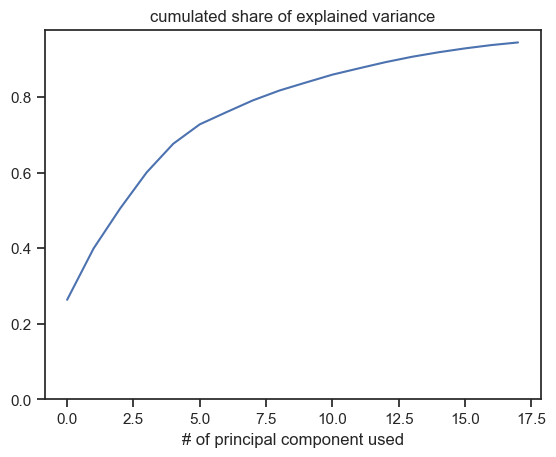

In [83]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [91]:
#New dataframe used for clustering 
X_proj = pca.transform(new_X)
X_proj = pd.DataFrame(X_proj)
X_proj

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.410915,0.850555,-1.616959,-1.269461,1.047439,2.240735,1.425725,0.228466,0.300254,0.660894,0.932981,-0.159744,-0.393866,0.333274,-0.646222,-0.110141,-0.295374,0.171449
1,-0.139610,0.696724,-1.562209,-1.136301,0.769400,3.550026,1.211159,1.232383,0.357619,0.735395,0.090193,-0.101370,0.105696,0.195497,-0.799353,-0.147668,-0.290840,0.164290
2,0.595579,3.182034,-0.411470,-1.414729,0.940754,1.591544,1.480781,-0.011940,0.466748,1.036301,-0.318776,-0.062766,0.007074,0.274897,-0.509468,-0.008992,-0.312247,-0.006778
3,-0.610414,1.051662,-1.131902,-1.172367,0.747213,2.685679,1.065407,1.187133,0.251972,0.783841,0.086941,-0.049330,0.070593,0.314920,-0.649725,-0.109941,-0.285540,0.163284
4,-0.276689,0.703359,-1.950473,-1.314683,1.272030,1.940815,1.437570,0.225605,0.284796,0.664829,0.928786,-0.169976,-0.396681,0.344519,-0.644493,-0.110296,-0.297615,0.172944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11587,1.831820,2.174401,0.394604,0.555652,-0.709408,-1.442898,0.689627,-0.369066,0.232172,0.016209,-0.538014,0.061911,-0.045485,-0.739301,-0.302801,-0.069571,0.115793,0.494094
11588,1.830366,2.161609,0.374710,0.562326,-0.692672,-1.428471,0.239020,0.862334,-0.012404,-0.186976,-0.123190,0.063260,0.022383,-0.717786,-0.290173,-0.090452,0.104656,0.500353
11589,2.190209,1.887414,-0.169957,0.530177,-0.348142,-1.295075,0.697047,-0.405335,0.348654,-0.449465,-0.667776,0.359159,-0.147215,-0.519816,-0.171983,-0.673401,0.394499,0.559563
11590,1.830366,2.161609,0.374710,0.562326,-0.692672,-1.428471,0.239020,0.862334,-0.012404,-0.186976,-0.123190,0.063260,0.022383,-0.717786,-0.290173,-0.090452,0.104656,0.500353


In [88]:
# Dataframe to understand and see the components 
pd.DataFrame(pca.components_, columns=pipeline.get_feature_names_out())

,num__longterm,num__kinky score,num__content type,num__story duration,num__play duration,num__audio_intensity,num__audio_kinks,cat__voice type_anonym,cat__voice type_female,cat__voice type_female_male,...,cat__fantasies_Transgender,cat__fantasies_Under the shower,cat__fantasies_Valentine's Day,cat__fantasies_Voyeurism,cat__fantasies_Winter,cat__fantasies_With a stranger,cat__session breakups_breakup_Early,cat__session breakups_breakup_First Peak,cat__session breakups_breakup_Late Peak,cat__session breakups_breakup_OFF
0,-0.023448,-0.474177,0.415282,0.395414,0.247498,-0.485625,0.179904,-0.066817,0.011926,-0.043540,...,-0.000001,0.001879,0.001451,0.005623,0.001487,0.048424,-0.000646,0.003314,0.000807,-0.003475
1,-0.104767,-0.502979,-0.377771,-0.298101,-0.271413,-0.479604,-0.309710,0.056243,0.035812,0.019382,...,0.000240,0.000304,0.000784,-0.050385,0.000396,0.003116,-0.007436,0.005892,0.005357,-0.003813
2,0.120342,-0.062376,0.201269,-0.361402,-0.614962,-0.075809,0.601939,-0.015607,-0.030726,-0.020474,...,-0.000036,0.001201,0.000860,0.013187,-0.000440,-0.027664,-0.005441,-0.004640,0.014453,-0.004373
3,-0.981192,0.054751,0.004053,0.030291,-0.083384,0.056605,0.105134,-0.021769,-0.010271,-0.010291,...,0.000042,-0.001820,0.000076,0.012986,0.001491,-0.006814,0.015448,-0.015767,0.008774,-0.008455
4,0.006078,-0.062672,-0.452559,0.018634,0.414120,-0.069041,0.670373,0.120430,0.009668,0.007979,...,-0.000012,-0.002906,0.001757,-0.041293,-0.009930,-0.059647,0.015341,-0.011615,-0.001395,-0.002330
5,0.061768,0.048258,-0.227508,0.725939,-0.553020,0.045069,0.052901,0.037490,0.016744,0.001458,...,-0.000075,-0.001924,0.001033,-0.008102,-0.006187,-0.000012,0.011158,0.003136,-0.003269,-0.011024
6,0.066879,-0.060747,-0.448872,0.122413,0.021840,-0.006998,-0.037819,-0.119203,-0.169813,-0.072115,...,0.000417,-0.001575,-0.000302,0.063387,0.011594,-0.032041,-0.267708,0.075356,0.182900,0.009452
7,0.036982,-0.034990,-0.141899,0.038004,-0.005274,-0.010536,-0.030399,-0.059652,0.045021,-0.020969,...,0.000348,-0.001340,-0.000568,0.025599,0.003572,-0.017670,0.774514,-0.179986,-0.456887,-0.137641
8,-0.003657,-0.030268,0.065111,0.088729,-0.028504,-0.016116,-0.052099,0.108042,0.397191,0.048325,...,-0.000089,-0.007402,-0.001833,0.048348,0.000534,-0.039231,-0.116632,-0.045830,0.127944,0.034518
9,0.017718,-0.010135,-0.055605,-0.040688,0.007257,0.010976,0.046322,-0.475520,0.475442,0.042586,...,0.000030,0.000415,0.000378,-0.010495,-0.002973,-0.030201,-0.001606,-0.130287,0.201578,-0.069686


## Clustering

In [93]:
from sklearn.cluster import KMeans

In [98]:
# Fit K-means
km = KMeans()
km.fit(X_proj)

KMeans()

Text(0.5, 0, 'k cluster number')

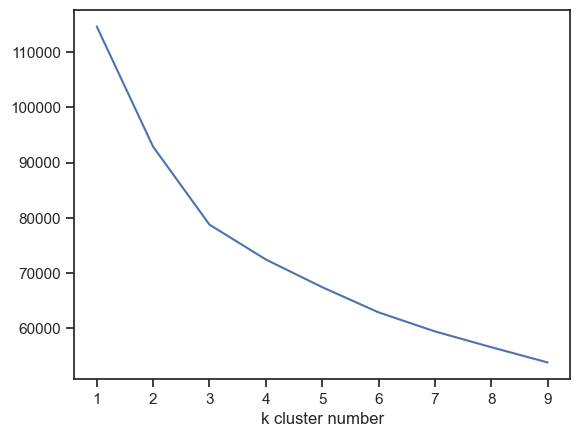

In [99]:
inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(X_proj)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [100]:
# Fit K-means with proper n of clusters
km = KMeans(n_clusters=3)
km.fit(X_proj)

KMeans(n_clusters=3)

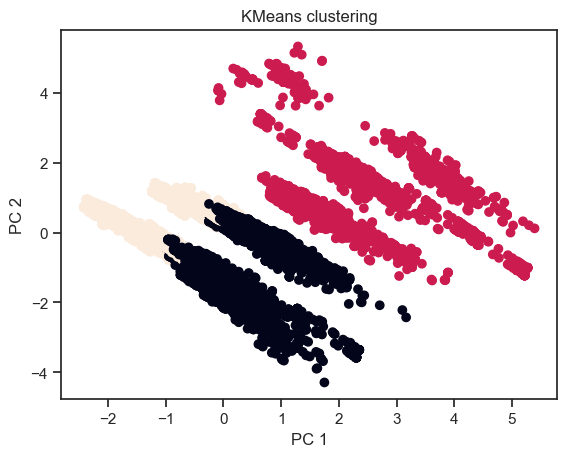

In [101]:
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

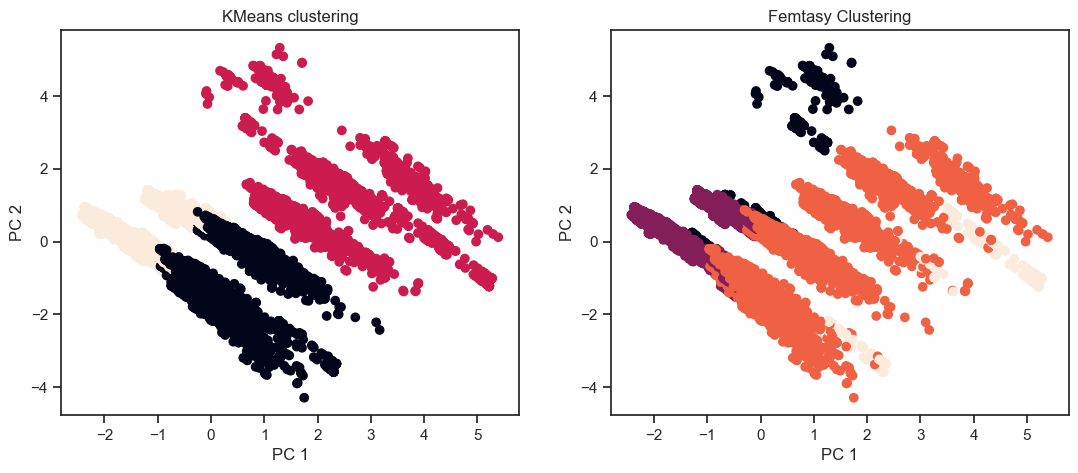

In [106]:
# Visualization
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')

plt.subplot(1,2,2)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=df_cluster["content type"])
plt.title('Femtasy Clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0        First Peak
1             Early
2         Late Peak
3             Early
4        First Peak
            ...    
12021     Late Peak
12022         Early
12023     Late Peak
12024         Early
12025     Late Peak
Name: session breakups_breakup, Length: 11592, dtype: object

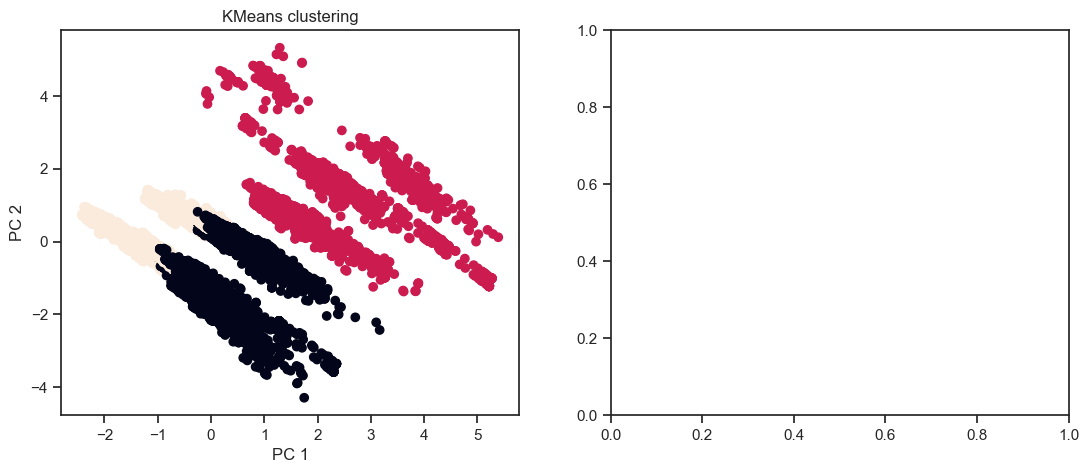

In [108]:
# Visualization
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')

plt.subplot(1,2,2)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=df_cluster["session breakups_breakup"])
plt.title('Femtasy Clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');